In [52]:
import numpy as np
from matplotlib import pyplot as plt

import os
import pickle
from time import time
from sklearn.decomposition import PCA

import george
from george import kernels
from scipy.optimize import minimize

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [205]:
w0=[-2.9086766, -3.0266216, -3.1385906, -3.2380328, -3.3243818, -3.3912644, \
    -3.427059 , -3.4192274, -3.2926285, -2.7189488, 1.9932499]

gamma=np.linspace(0,2,11)

In [206]:
p=np.flip(np.polyfit(gamma,w0,9))

[  -2.90869177    0.94629457  -19.79130037   99.21527613 -258.81050667
  392.42717027 -358.25430518  194.1159741   -57.50307195    7.17571925]


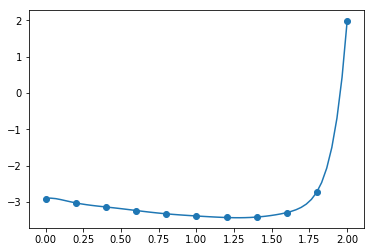

In [207]:
print(p)
plt.scatter(gamma,w0)
x=np.linspace(0,2,60)
out=0
for i in range(len(p)):
    out+=p[i]*(x**i)
plt.plot(x,out)

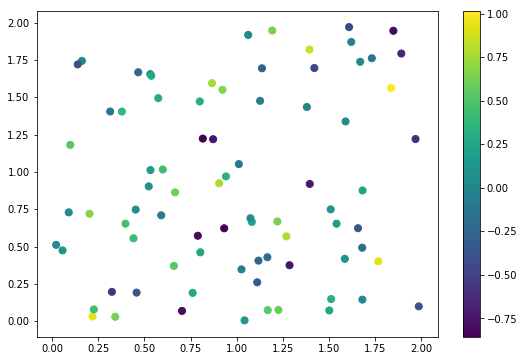

In [314]:
np.random.seed(122)
x=2*np.random.rand(80,2)
yerr=0.15*np.ones_like(x[:,0])
y=np.sin(6*x[:,0])*np.cos(10*x[:,1]) + yerr*np.random.randn(len(x))

plt.figure(figsize=(9,6))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style)
plt.colorbar()


[0.33634179 0.2        0.12      ]


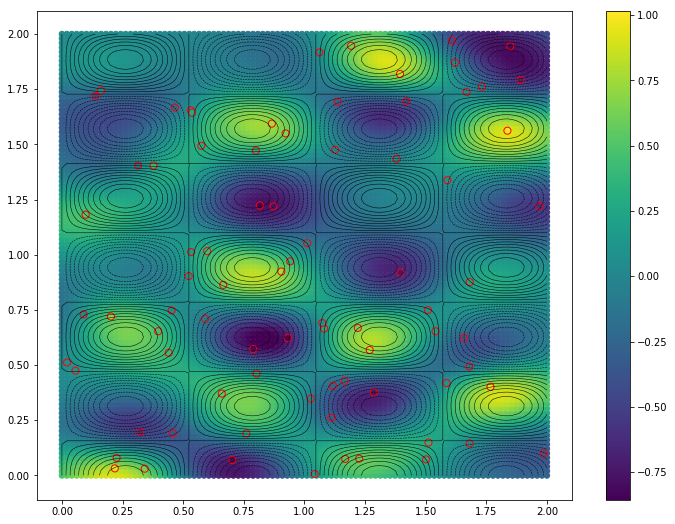

In [315]:
kernel = np.var(y) * kernels.ExpSquaredKernel(0.20**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.12**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x, yerr)

print(np.sqrt(np.exp(gp.get_parameter_vector())))


x0pred,x1pred=np.meshgrid(np.linspace(0, 2, 100),np.linspace(0, 2, 100))
x_pred=list(map(lambda x, y:(x,y), np.ndarray.flatten(x0pred), np.ndarray.flatten(x1pred)))
pred, pred_var = gp.predict(y, x_pred, return_var=True)

plt.figure(figsize=(12,9))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred, s=30, **style)
plt.colorbar()
plt.contour(x0pred,x1pred,np.sin(6*x0pred)*np.cos(10*x1pred),levels=20,colors='k',linewidths=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style,edgecolors='r')
plt.show()

In [316]:
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -41.79
[-2.17925479 -3.21887582 -4.24052707]
[0.33634179 0.2        0.12      ]


In [318]:
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)

gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

print(np.sqrt(np.exp(gp.get_parameter_vector())))

      fun: 40.4178376561583
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([ 5.21088152e-07, -5.69727500e-07, -8.09442012e-08])
  message: 'Optimization terminated successfully.'
     nfev: 1
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-2.07523701, -3.31513649, -4.59809496])

Final ln-likelihood: -40.42
[0.35429744 0.19060191 0.10035439]


[0.35429744 0.19060191 0.10035439]


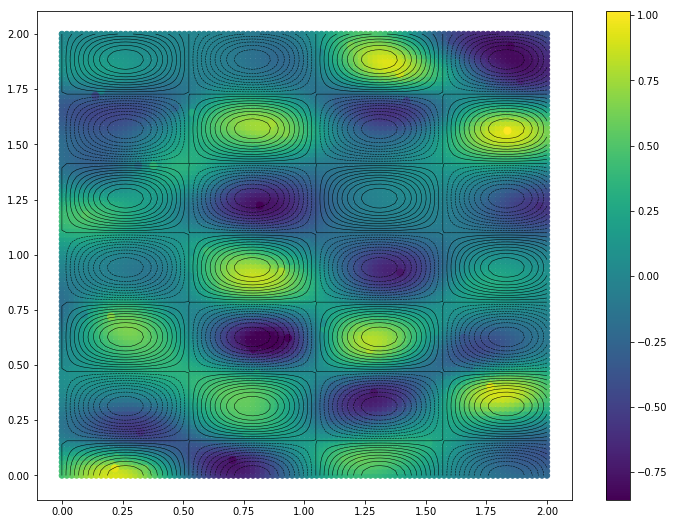

In [319]:
pred, pred_var = gp.predict(y, x_pred, return_var=True)

print(np.sqrt(np.exp(gp.get_parameter_vector())))

plt.figure(figsize=(12,9))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred, s=30, **style)
plt.colorbar()
plt.contour(x0pred,x1pred,np.sin(6*x0pred)*np.cos(10*x1pred),levels=20,colors='k',linewidths=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style)#,edgecolors='r')
plt.show()

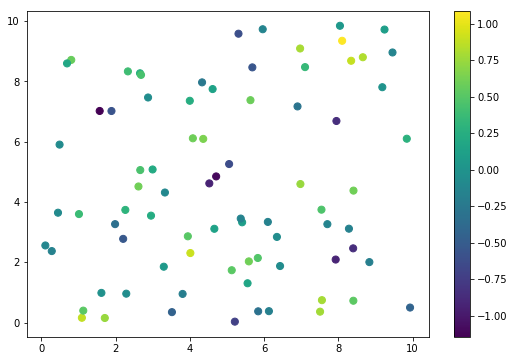

In [322]:
np.random.seed(122)
x=10*np.random.rand(80,2)
yerr=0.15*np.ones_like(x[:,0])
y=np.sin(x[:,0])*np.cos(1.4*x[:,1]) + yerr*np.random.randn(len(x))

plt.figure(figsize=(9,6))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style)
plt.colorbar()


[0.36293089 1.         0.8       ]


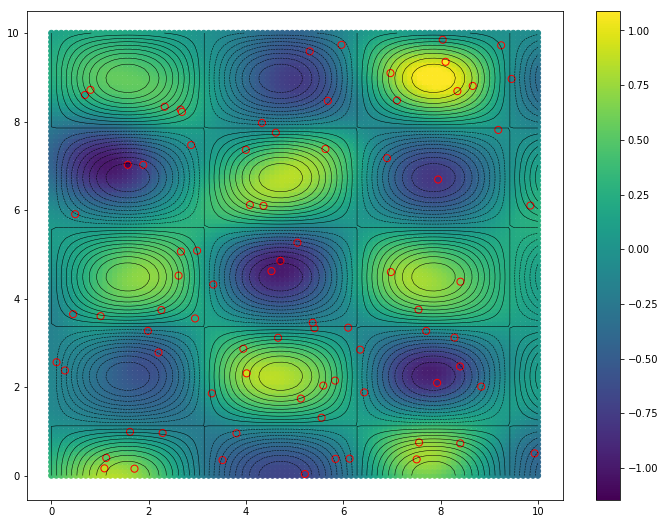

In [323]:
kernel = np.var(y) * kernels.ExpSquaredKernel(1**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.8**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x, yerr)
print(np.sqrt(np.exp(gp.get_parameter_vector())))

x0pred,x1pred=np.meshgrid(np.linspace(0, 10, 100),np.linspace(0, 10, 100))
x_pred=list(map(lambda x, y:(x,y), np.ndarray.flatten(x0pred), np.ndarray.flatten(x1pred)))
pred, pred_var = gp.predict(y, x_pred, return_var=True)

plt.figure(figsize=(12,9))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred, s=30, **style)
plt.colorbar()
plt.contour(x0pred,x1pred,np.sin(x0pred)*np.cos(1.4*x1pred),levels=20,colors='k',linewidths=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style,edgecolors='r')
plt.show()

In [324]:
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -32.48
[-2.02708572  0.         -0.4462871 ]
[0.36293089 1.         0.8       ]


In [325]:
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)

gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

print(np.sqrt(np.exp(gp.get_parameter_vector())))


      fun: 31.82282438933511
 hess_inv: array([[0.08107915, 0.04701569, 0.05022794],
       [0.04701569, 0.09182307, 0.02442713],
       [0.05022794, 0.02442713, 0.10968981]])
      jac: array([-2.34936940e-07,  4.62793645e-07,  9.61989491e-08])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([-1.91002621,  0.33285805, -0.51262979])

Final ln-likelihood: -31.82
[0.3848071  1.18107971 0.77389823]


[0.3848071  1.18107971 0.77389823]


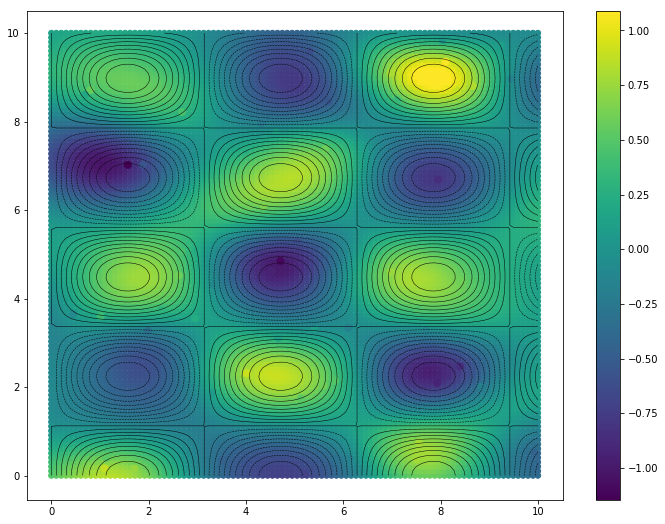

In [326]:
pred, pred_var = gp.predict(y, x_pred, return_var=True)

print(np.sqrt(np.exp(gp.get_parameter_vector())))

plt.figure(figsize=(12,9))
style = dict(cmap='viridis', vmin=np.min(y), vmax=np.max(y))
plt.scatter(np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred, s=30, **style)
plt.colorbar()
plt.contour(x0pred,x1pred,np.sin(x0pred)*np.cos(1.4*x1pred),levels=20,colors='k',linewidths=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, **style)#,edgecolors='r')

plt.show()

ValueError: Argument Z must be 2-dimensional.

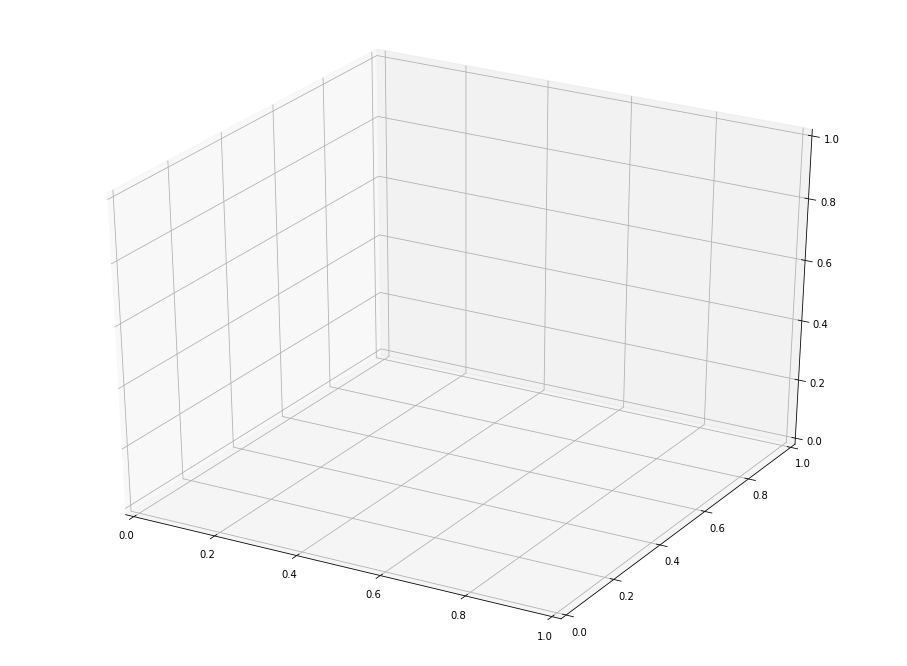

In [348]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111,projection='3d')

# Plot the surface.
surf = ax.plot_surface(np.array(x_pred)[:,0], np.array(x_pred)[:,1], pred)

plt.show()

In [342]:
print(x0pred.shape, x1pred.shape)

(100, 100) (100, 100)


In [344]:
(np.sin(x0pred)*np.cos(1.4*x1pred)).shape

(100, 100)

In [ ]:
np.array(x_pred)[:,0], np.array(x_pred)[:,1], c=pred

In [356]:
np.array(x_pred)[:,0][100]

0.0

In [347]:
pred.shape

(10000,)

In [350]:
x1pred

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.1010101,  0.1010101,  0.1010101, ...,  0.1010101,  0.1010101,
         0.1010101],
       [ 0.2020202,  0.2020202,  0.2020202, ...,  0.2020202,  0.2020202,
         0.2020202],
       ...,
       [ 9.7979798,  9.7979798,  9.7979798, ...,  9.7979798,  9.7979798,
         9.7979798],
       [ 9.8989899,  9.8989899,  9.8989899, ...,  9.8989899,  9.8989899,
         9.8989899],
       [10.       , 10.       , 10.       , ..., 10.       , 10.       ,
        10.       ]])